# The Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HelpfulFunctions as hp
import pandas as pd

plt.style.use('seaborn')
%matplotlib inline

## Cost Function

In [2]:
def cost(p,y):
    c = (p**y) *((1-p)**(1-y))
    return c

In [7]:
cost(0.3,0.4)

0.49877804185215613

In [8]:
p = np.linspace(0,1.0,100)

In [9]:
y = +1

In [10]:
cvec=cost(p,y)

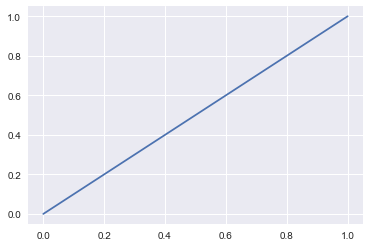

In [11]:
plt.plot(p,cvec)

## Load Iris Dataset

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
X = pd.DataFrame(iris.data)

In [17]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
#wei. no spaces btw names -- created by own

In [22]:
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Load the labels
y = iris.target

In [24]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [31]:
species = []
for i in y:
    name = iris['target_names'][i]
    species.append(name)
# created a species of data on last column.
#wow

In [32]:
X['species'] = species

In [33]:
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
X.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Feature Space Plots

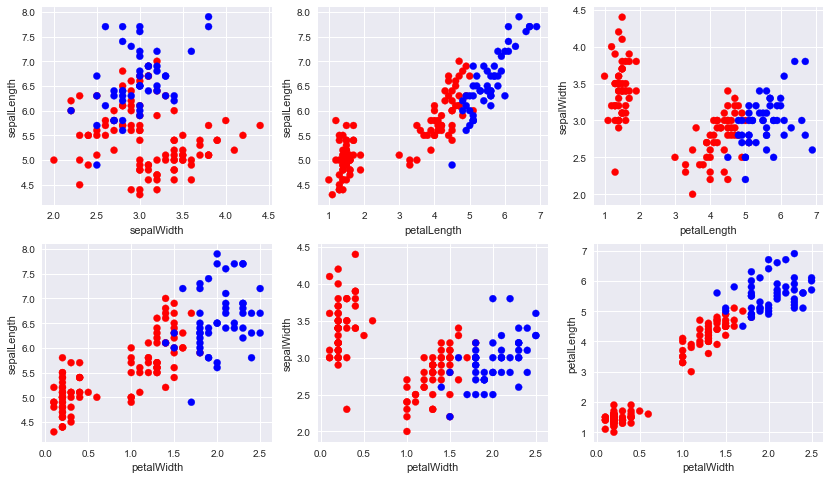

In [42]:
plt_idx = 1
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(14, 8))

for index1 in range(0,4):
    for index2 in range(0,index1):
        f1 = X.columns[index1]
        f2 = X.columns[index2]
        x1 = X[f1]
        x2 = X[f2]
        plt.subplot(2,3,plt_idx)
        plt.scatter(x1,x2,c = y, cmap = cmap_bold)
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt_idx = plt_idx+1

## Case Study of Logistic Regression

We wish to use Logistic Regression to determine whether a given Iris is a Virginica or not

In [36]:
from sklearn.linear_model import LogisticRegression

### Building a Model with One Feature

In [37]:
# We use one of the features to model the flower type 
X_1 = X['petalWidth']

In [38]:
X_1 = X_1.values.reshape(150,1)

In [39]:
# Load the labels
y = iris['target']

In [40]:
y = (np.array(y)==2).astype(np.int)

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# Fit the model 
log_reg = LogisticRegression()

log_reg.fit(X_1,y)

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
log_reg.coef_

array([[2.61789264]])

In [45]:
log_reg.intercept_

array([-4.22209186])

In [46]:
# Generate 1000 X-values (petal widths) from 0cm to 3cm 
X_new = np.linspace(0,3,1000)
print(X_new)

[0.         0.003003   0.00600601 0.00900901 0.01201201 0.01501502
 0.01801802 0.02102102 0.02402402 0.02702703 0.03003003 0.03303303
 0.03603604 0.03903904 0.04204204 0.04504505 0.04804805 0.05105105
 0.05405405 0.05705706 0.06006006 0.06306306 0.06606607 0.06906907
 0.07207207 0.07507508 0.07807808 0.08108108 0.08408408 0.08708709
 0.09009009 0.09309309 0.0960961  0.0990991  0.1021021  0.10510511
 0.10810811 0.11111111 0.11411411 0.11711712 0.12012012 0.12312312
 0.12612613 0.12912913 0.13213213 0.13513514 0.13813814 0.14114114
 0.14414414 0.14714715 0.15015015 0.15315315 0.15615616 0.15915916
 0.16216216 0.16516517 0.16816817 0.17117117 0.17417417 0.17717718
 0.18018018 0.18318318 0.18618619 0.18918919 0.19219219 0.1951952
 0.1981982  0.2012012  0.2042042  0.20720721 0.21021021 0.21321321
 0.21621622 0.21921922 0.22222222 0.22522523 0.22822823 0.23123123
 0.23423423 0.23723724 0.24024024 0.24324324 0.24624625 0.24924925
 0.25225225 0.25525526 0.25825826 0.26126126 0.26426426 0.26726

In [48]:
X_new = X_new.reshape(-1,1)
print(X_new)

[[0.        ]
 [0.003003  ]
 [0.00600601]
 [0.00900901]
 [0.01201201]
 [0.01501502]
 [0.01801802]
 [0.02102102]
 [0.02402402]
 [0.02702703]
 [0.03003003]
 [0.03303303]
 [0.03603604]
 [0.03903904]
 [0.04204204]
 [0.04504505]
 [0.04804805]
 [0.05105105]
 [0.05405405]
 [0.05705706]
 [0.06006006]
 [0.06306306]
 [0.06606607]
 [0.06906907]
 [0.07207207]
 [0.07507508]
 [0.07807808]
 [0.08108108]
 [0.08408408]
 [0.08708709]
 [0.09009009]
 [0.09309309]
 [0.0960961 ]
 [0.0990991 ]
 [0.1021021 ]
 [0.10510511]
 [0.10810811]
 [0.11111111]
 [0.11411411]
 [0.11711712]
 [0.12012012]
 [0.12312312]
 [0.12612613]
 [0.12912913]
 [0.13213213]
 [0.13513514]
 [0.13813814]
 [0.14114114]
 [0.14414414]
 [0.14714715]
 [0.15015015]
 [0.15315315]
 [0.15615616]
 [0.15915916]
 [0.16216216]
 [0.16516517]
 [0.16816817]
 [0.17117117]
 [0.17417417]
 [0.17717718]
 [0.18018018]
 [0.18318318]
 [0.18618619]
 [0.18918919]
 [0.19219219]
 [0.1951952 ]
 [0.1981982 ]
 [0.2012012 ]
 [0.2042042 ]
 [0.20720721]
 [0.21021021]
 [0.21

In [49]:
# Predict the probability of it being Iris Virginica
y_proba = log_reg.predict_proba(X_new)

In [50]:
y_2 = 1.0 / (1.0 + np.exp(-log_reg.intercept_-X_new*log_reg.coef_[0]))

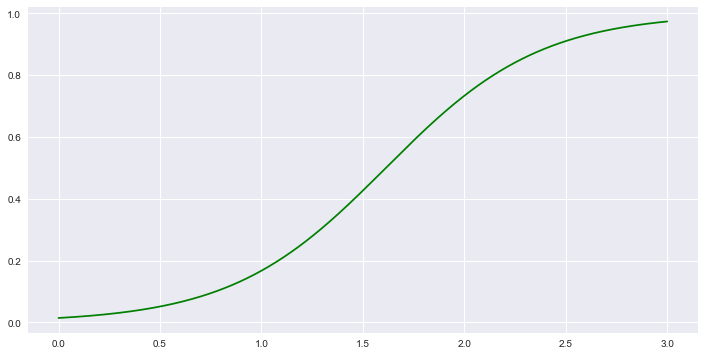

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(X_new,y_2,'g-')

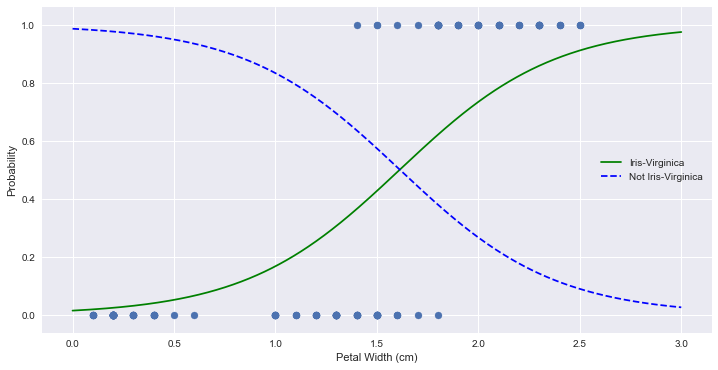

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(X_1,y)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel('Probability');
plt.legend()

In [53]:
y_pred  = log_reg.predict(X_1)

In [54]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [55]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [56]:
y - y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

-1 is a case where it is not virginica so prediction is incorrect - this happens 2 times

+1 is a case where it is virginica and the prediction is incorrect - this happens 4 times

## All Four Features

In [57]:
X_4 = X.drop(['species'],axis = 1)

In [58]:
log_reg.fit(X_4,y)

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
print(log_reg.coef_)
#full features being used.

[[-1.70751526 -1.53427768  2.47096755  2.55537041]]


In [62]:
print(log_reg.intercept_)

[-1.21470917]


In [63]:
y_pred = log_reg.predict(X_4)

In [64]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## Visualising the Feature Space

We can see how the logistic regression splits the space of features into the different classification regions

In [65]:
import HelpfulFunctions as hp

### Using Two Features in the Model

In [66]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

In [67]:
X_2 = X[[featureX,featureY]]

In [68]:
X_2

,sepalLength,sepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

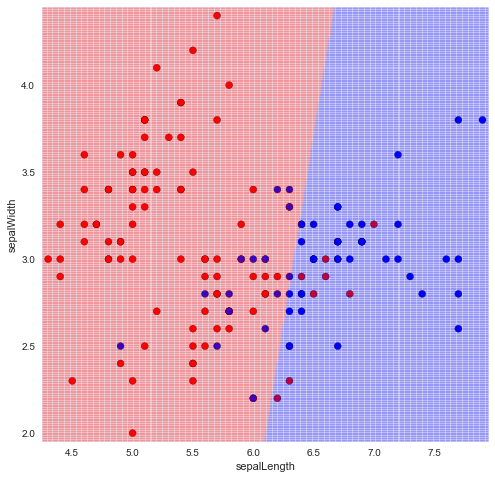

In [71]:
#clf = LogisticRegression()
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_2,y)
plt.figure(figsize=(8, 8))
hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)
#vector of ones/ zeros, EXAMABLE, pending to titanic data!!!! who survives and who not. like this????

The boundary is a straight line

###  Using a Different Two Features

In [57]:
featureX = 'petalWidth'
featureY = 'sepalWidth'

In [58]:
X_2 = X[[featureX,featureY]]

C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


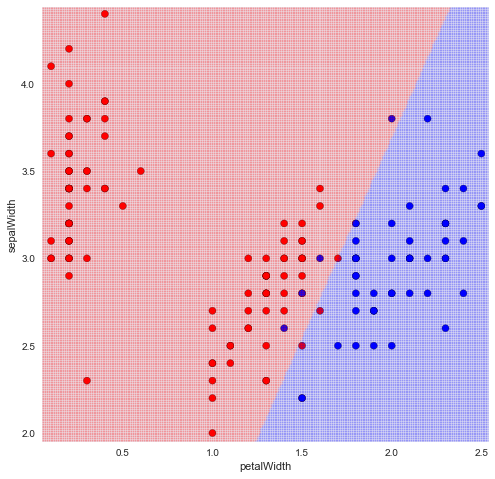

In [59]:
clf = LogisticRegression()
clf.fit(X_2,y)
plt.figure(figsize=(8, 8))
hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

The boundary is a straight line